<a href="https://colab.research.google.com/github/likeyfung/Pytorch-Tutorial/blob/main/Simple_Neural_Network2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Create Network**

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [27]:
# Create a Model Class that inherits nn.Module
# Instantiate our parent module (nn.Module) with super()
# Design Structure: Input layer (4 features) -->Hidden layer h1 & h2 (number of neuron) --> Output (3 cases)
# Layer creation with nn.Linear
# Define foward() pass through the layers as data flow
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)

    return x



In [28]:
#Pick a manual seed for randomization
torch.manual_seed(41)

#Create an instance of model
model = Model()


**Load and Tain Data**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df=pd.read_csv(url)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [31]:
# Change Last Column to Numbers
my_df['species'] = my_df['species'].replace('setosa', 0)
my_df['species'] = my_df['species'].replace('versicolor', 1)
my_df['species'] = my_df['species'].replace('virginica', 2)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
# Train Test Split, Sext X, y
# Extract the input features, so drop the known output
X = my_df.drop('species', axis=1)
y = my_df['species']
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [33]:
#Convert these to numpy arrays
X = X.values
y = y.values

In [34]:
#Convert X features (Matrix input) to Float Tensor, then convert y label (vector output) to Long Tensor(=torch.int64) here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [35]:
#Set the criterion of model to measure the error, how far off the predictions are from the data
criterion =nn.CrossEntropyLoss()
# Choose an optimizer & Set learning rate (if errors doesn't go down after a bunch of iterations, (epoches), lowering our learning rate (longer time) )
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [37]:
# Train our model (epoch is one run through all the training data in our network)
epochs =100
losses =[]
for i in range(epochs):
  #Go forward and get a prediction
  y_pred = model.forward(X_train)

  #Maesure the loss/error, goona be high ast first; We'd also like to keep track of the losses, and we print every 10 epochs
  loss= criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i%10==0:
    print(f'Epoch:{i}and loss:{loss}')

  # Then do some back propagagtion: take the error rate of the forward propagation and feed it back through the network to fine tune the weight
  # When you train a neural network, gradients accumulate by default whenever .backward() is called on the loss tensor. So reset the gradiemnt first
  # then we calculate the new gradient of the loss. This step doesn't change the model's weights; it just calculates and stores the gradients
  # then the optimizer takes the current gradients to updates the model's parameters (weights and biases), moving them to optimal values.
  # Reset old graidents(Some models don't reuqire) -> Cal Loss and new gradient ->  Optimize with new parameter using new gradient
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch:0and loss:1.1251550912857056
Epoch:10and loss:1.0096259117126465
Epoch:20and loss:0.8157405853271484
Epoch:30and loss:0.585706353187561
Epoch:40and loss:0.3999636471271515
Epoch:50and loss:0.26768800616264343
Epoch:60and loss:0.17942361533641815
Epoch:70and loss:0.12151690572500229
Epoch:80and loss:0.0860118493437767
Epoch:90and loss:0.06520850956439972


Text(0.5, 0, 'Epoch')

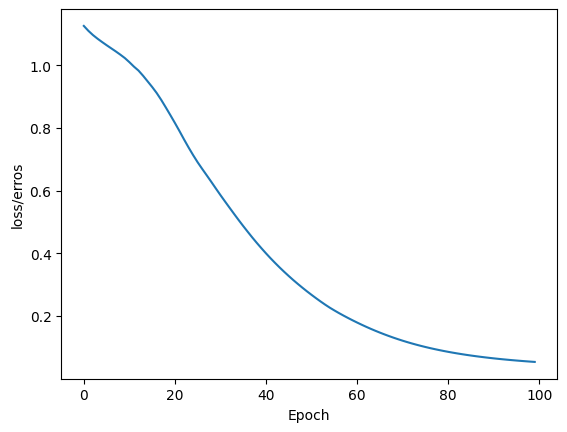

In [39]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel('loss/erros')
plt.xlabel('Epoch')

**Evaluate/Validate Model on Test Data Set**